In [1]:
# First thing first, we need to download important libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
basket_data=pd.read_csv("baskets_sample.csv")

In [3]:
basket_data.head()

,customer_number,purchase_time,basket_quantity,basket_spend,basket_categories
0,11911,2007-03-01 07:06:00,7,£3.09,3
1,4047,2007-03-01 07:13:00,9,£7.99,5
2,3571,2007-03-01 07:27:00,9,£37.06,6
3,4079,2007-03-01 07:34:00,11,£11.91,5
4,6063,2007-03-01 07:36:00,3,£1.45,1


In [4]:
basket_data.shape

(195547, 5)

In [5]:
basket_data.dtypes

customer_number       int64
purchase_time        object
basket_quantity       int64
basket_spend         object
basket_categories     int64
dtype: object

In [6]:
basket_data = basket_data.replace({'\£':''}, regex = True)
basket_data = basket_data.replace({'\,':''}, regex = True)

In [7]:
basket_data.head()

,customer_number,purchase_time,basket_quantity,basket_spend,basket_categories
0,11911,2007-03-01 07:06:00,7,3.09,3
1,4047,2007-03-01 07:13:00,9,7.99,5
2,3571,2007-03-01 07:27:00,9,37.06,6
3,4079,2007-03-01 07:34:00,11,11.91,5
4,6063,2007-03-01 07:36:00,3,1.45,1


In [8]:
basket_data.dtypes

customer_number       int64
purchase_time        object
basket_quantity       int64
basket_spend         object
basket_categories     int64
dtype: object

In [9]:
# Let's change basket_spend data from object to float to make our life easier 
basket_data['basket_spend']=basket_data['basket_spend'].astype(float)

In [10]:
# Data time has different type in python. Let's convert it's type from obj to datetime
basket_data['purchase_time']=pd.to_datetime(basket_data['purchase_time'])

In [11]:
basket_data.dtypes

customer_number               int64
purchase_time        datetime64[ns]
basket_quantity               int64
basket_spend                float64
basket_categories             int64
dtype: object

In [12]:
# Data cleaning. First step is to check for any missing value
basket_data.isnull().sum(axis=0)

customer_number      0
purchase_time        0
basket_quantity      0
basket_spend         0
basket_categories    0
dtype: int64

In [13]:
# Summary stats of our data set
basket_data.describe()

,customer_number,basket_quantity,basket_spend,basket_categories
count,195547.000000,195547.000000,195547.000000,195547.000000
mean,7896.492899,8.955218,11.804010,4.231990
std,4408.251411,9.510890,13.031542,2.478016
min,14.000000,-11.000000,-98.400000,1.000000
25%,4323.000000,3.000000,4.280000,2.000000
50%,7944.000000,6.000000,8.130000,4.000000
75%,11324.000000,11.000000,14.480000,6.000000
max,16316.000000,190.000000,377.280000,16.000000


In [14]:
basket_data.customer_number.value_counts

<bound method IndexOpsMixin.value_counts of 0         11911
1          4047
2          3571
3          4079
4          6063
          ...  
195542     5107
195543     1988
195544     3028
195545     7191
195546    10107
Name: customer_number, Length: 195547, dtype: int64>

In [15]:
basket_data.value_counts()

customer_number  purchase_time        basket_quantity  basket_spend  basket_categories
14               2007-03-03 15:37:00  10               16.81         7                    1
10328            2007-08-23 08:18:00  11               10.22         5                    1
                 2007-08-09 08:35:00  3                1.59          2                    1
                 2007-08-11 17:51:00  3                2.89          2                    1
                 2007-08-13 08:26:00  16               17.19         6                    1
                                                                                         ..
5377             2007-05-23 10:34:00  5                12.32         5                    1
                 2007-05-24 10:11:00  4                9.42          3                    1
                 2007-05-25 11:44:00  9                14.74         6                    1
                 2007-05-26 09:59:00  5                8.86          5               

In [16]:
# Trying to check the exact number of custoers with their unique ids
basket_data.customer_number.nunique()

3000

In [17]:
# Data cleaning requires us to look into duplicate values as well
basket_data.drop_duplicates()

,customer_number,purchase_time,basket_quantity,basket_spend,basket_categories
0,11911,2007-03-01 07:06:00,7,3.09,3
1,4047,2007-03-01 07:13:00,9,7.99,5
2,3571,2007-03-01 07:27:00,9,37.06,6
3,4079,2007-03-01 07:34:00,11,11.91,5
4,6063,2007-03-01 07:36:00,3,1.45,1
...,...,...,...,...,...
195542,5107,2007-08-31 21:40:00,6,9.66,3
195543,1988,2007-08-31 21:45:00,12,14.98,6
195544,3028,2007-08-31 21:46:00,6,6.21,2
195545,7191,2007-08-31 21:46:00,7,6.30,3


In [18]:
# Let's check negative vlaues of basket column and basket spend
basket_data.basket_quantity.min()

-11

In [19]:
basket_data.basket_spend.min()

-98.4

In [20]:
## We have negative basket_quantity and basket_spend. There are issues with this. 
# Now, there might be the case when basket was returned, thus fetchig negative values for both basket_quantity and basket_spending
basket_data.loc[basket_data['basket_quantity']<0].basket_quantity.count()

19

In [21]:
print('The number of entries with negative basket_quantity: ', basket_data.loc[basket_data['basket_quantity']<0].basket_quantity.count())

The number of entries with negative basket_quantity:  19


In [22]:
basket_data.loc[basket_data['basket_spend']<0].basket_spend.count()

160

In [23]:
# Let's look at the correspnding columns and thier relationship

In [24]:
basket_data.loc[basket_data['basket_spend']<0,['customer_number','basket_spend','purchase_time','basket_quantity','basket_categories']]

,customer_number,basket_spend,purchase_time,basket_quantity,basket_categories
1440,3046,-8.87,2007-03-02 10:35:00,4,3
3084,14891,-2.63,2007-03-03 13:20:00,-1,1
3579,4696,-3.70,2007-03-03 18:58:00,4,3
4069,7955,-6.19,2007-03-04 15:19:00,-1,1
4172,11291,-1.27,2007-03-04 18:34:00,4,3
...,...,...,...,...,...
185545,11400,-0.98,2007-08-22 09:35:00,4,5
186871,11476,-4.16,2007-08-23 11:42:00,5,2
189621,6602,-12.89,2007-08-25 16:21:00,2,2
189894,1910,-2.90,2007-08-26 10:07:00,10,3


In [25]:
# Let's create a small data frame of negative basket spend and quantities to further investigate their relation
observe_data=basket_data.loc[basket_data['basket_spend']<0,['customer_number','basket_spend','purchase_time','basket_quantity','basket_categories']]

In [26]:
# Let's plot the observing data set of negative values

Text(0.5, 1.0, 'Basket and Spending Relation while looking at just negative values')

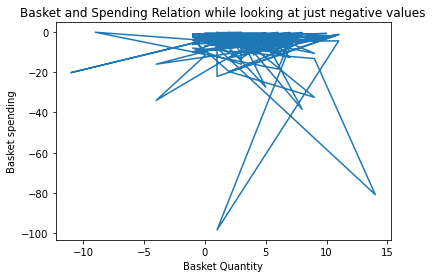

In [27]:
plt.plot(observe_data.basket_quantity, observe_data.basket_spend)
plt.xlabel("Basket Quantity")
plt.ylabel("Basket spending")
plt.title("Basket and Spending Relation while looking at just negative values")

Text(0.5, 1.0, 'Basket Quantity and Spend relationship of original data set')

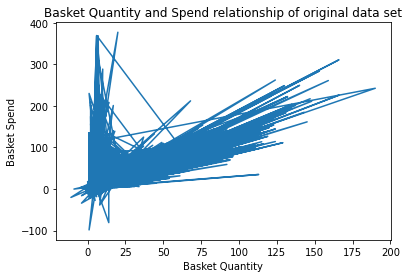

In [28]:
# Let's look at the original data set 
plt.plot(basket_data.basket_quantity, basket_data.basket_spend)
plt.xlabel("Basket Quantity")
plt.ylabel("Basket Spend")
plt.title("Basket Quantity and Spend relationship of original data set")

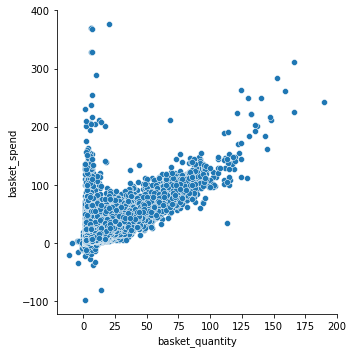

In [29]:
sns.relplot(x='basket_quantity', y='basket_spend', data=basket_data)

In [30]:
# Let's remove the negative values and see what happends to our relationship
basket_data = basket_data[(basket_data['basket_quantity']>0)]

In [31]:
# Let's remove rows with negative spending values as we can see we have positive basket quantity but negative spending
basket_data = basket_data[(basket_data['basket_spend']>0)]

Text(0.5, 1.0, 'Basket Quantity and Spend relationship after removing negative values in quantity and spending columns')

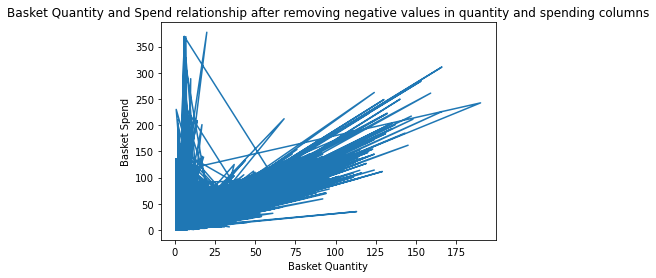

In [32]:
# Let's look at the original data set after removing negarive value in spend and quanity columns. This is looking smoohter now..
plt.plot(basket_data.basket_quantity, basket_data.basket_spend)
plt.xlabel("Basket Quantity")
plt.ylabel("Basket Spend")
plt.title("Basket Quantity and Spend relationship after removing negative values in quantity and spending columns")

In [33]:
# Now, spending and basket are much more linear and their relationship makes sense

In [34]:
basket_data.describe()

,customer_number,basket_quantity,basket_spend,basket_categories
count,195371.000000,195371.000000,195371.000000,195371.000000
mean,7896.000706,8.960455,11.819944,4.232890
std,4408.420085,9.512951,13.022177,2.478439
min,14.000000,1.000000,0.010000,1.000000
25%,4323.000000,3.000000,4.290000,2.000000
50%,7944.000000,6.000000,8.140000,4.000000
75%,11324.000000,11.000000,14.490000,6.000000
max,16316.000000,190.000000,377.280000,16.000000


C:\Users\balaj\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\balaj\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\balaj\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

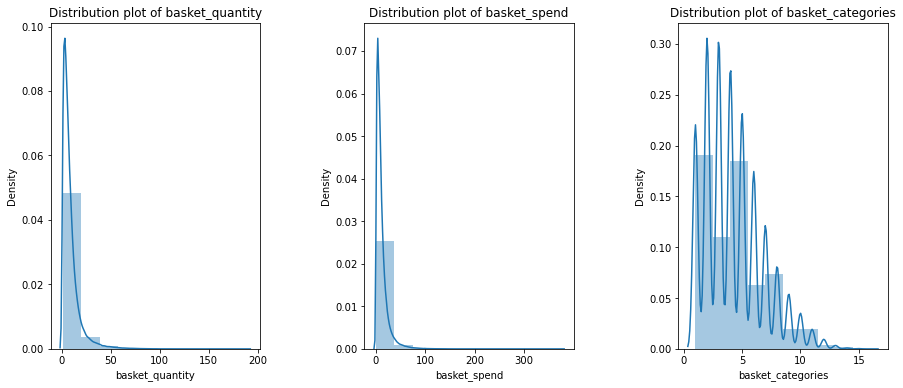

In [35]:
plt.figure(1, figsize=(15,6))
n=0
for x in ['basket_quantity','basket_spend','basket_categories']:
    n+=1
    plt.subplot(1,3,n)
    plt.subplots_adjust(hspace=0.5,wspace=0.5)
    sns.distplot(basket_data[x],bins=10)
    plt.title('Distribution plot of {}'.format(x))
plt.show()

In [36]:
# Interpretation of above distribution plots
# Basket quantity and spending are not more than 50 and 100 respectively.

In [37]:
print('Starting date of this data set: ', basket_data['purchase_time'].min())
print("Ending data of this data set, i.e., Last date of data record:  ", basket_data['purchase_time'].max())

Starting date of this data set:  2007-03-01 07:06:00
Ending data of this data set, i.e., Last date of data record:   2007-08-31 21:55:00


In [38]:
Record_time_period = basket_data['purchase_time'].max() - basket_data['purchase_time'].min()
print('It is almost a record of: ', Record_time_period)

It is almost a record of:  183 days 14:49:00


In [39]:
# Thus alomost 6 monhts 

In [40]:
# In order to find out recency, we need to set a date when we start analyzing this data set.
latest_date= pd.to_datetime('2007-09-01')

In [41]:
latest_date

Timestamp('2007-09-01 00:00:00')

In [42]:
# Building RFM model. First we groupby customer number to fix other features aroudn our customer_number. 
#AFterwards, we find out purchase date by subtracitng the dat of analysis(latest date) by the last purchase date of every custoemr.
# Secondly, basket quantity is calcuted by counting the number of baskets associated with the particular custoemr_id
#Lastly, basket spend is calculatd using sum function on evey customre id. This sums the spending value for each customer.
RFM_data=basket_data.groupby('customer_number').agg({'purchase_time': lambda x: (latest_date-x.max()).days, 'basket_quantity': lambda x: len(x), 'basket_spend': lambda x: x.sum()})

In [43]:
RFM_data.head()

,purchase_time,basket_quantity,basket_spend
customer_number,,,
14,1,56,675.72
45,1,33,585.73
52,2,59,222.18
61,3,37,547.87
63,7,48,293.34


In [44]:
RFM_data.shape

(3000, 3)

In [45]:
#Let's rename column names to make our life easier
RFM_data.rename(columns={'purchase_time': 'Recency',
                         'basket_quantity':'Frequency',
                         'basket_spend': 'Monetary'}, inplace=True)

In [46]:
# Here reset index is applied to make all the columns look even in the data frame
RFM_data.reset_index().head()

,customer_number,Recency,Frequency,Monetary
0,14,1,56,675.72
1,45,1,33,585.73
2,52,2,59,222.18
3,61,3,37,547.87
4,63,7,48,293.34


In [47]:
RFM_data.describe()

,Recency,Frequency,Monetary
count,3000.000000,3000.000000,3000.000000
mean,8.121667,65.123667,769.758087
std,20.938489,47.392134,552.972322
min,0.000000,1.000000,7.280000
25%,0.000000,32.000000,406.707500
50%,2.000000,53.000000,627.170000
75%,6.000000,86.000000,958.660000
max,164.000000,374.000000,6588.650000


C:\Users\balaj\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\balaj\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\balaj\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

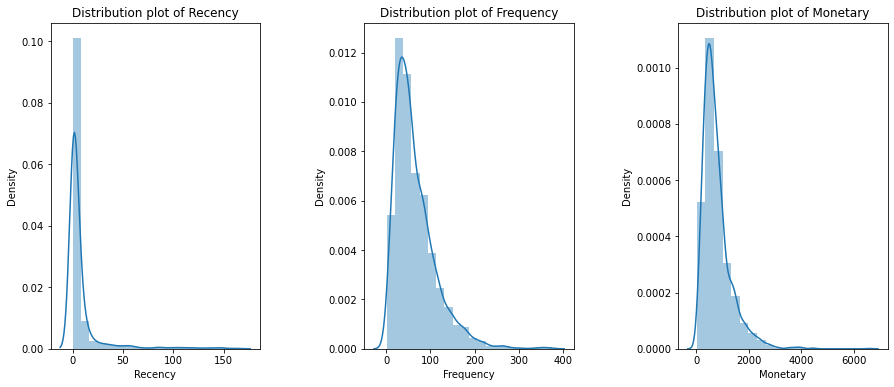

In [48]:
# Let's see the frequency distribution of RFM model. 
plt.figure(1, figsize=(15,6))
n=0
for x in ['Recency','Frequency','Monetary']:
    n+=1
    plt.subplot(1,3,n)
    plt.subplots_adjust(hspace=0.5,wspace=0.5)
    sns.distplot(RFM_data[x],bins=20)
    plt.title('Distribution plot of {}'.format(x))
plt.show()

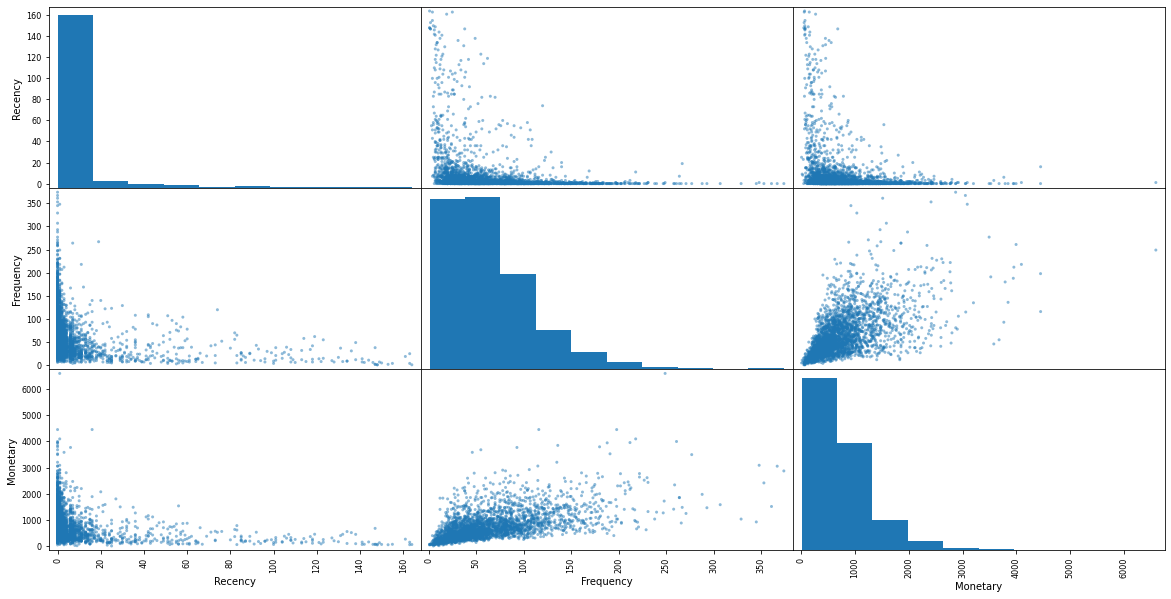

In [49]:
# Diagonal in scatter matrix shows the nature of data. We need to normalize or standardize depending on the skewness of the data
scatter=pd.plotting.scatter_matrix(RFM_data, figsize=(20,10))

In [50]:
# Since data is rightly skewed. Before applying any clustering algorithm, we need to strandardize it. The performance of K-means is better at scaled data
from sklearn.preprocessing import StandardScaler

# Scale the data
scaler = StandardScaler()
scaler.fit(RFM_data)
scaled_data = scaler.transform(RFM_data)

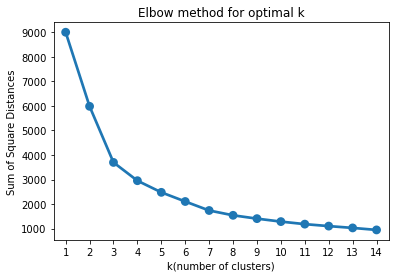

In [51]:
# K-mean need the parameter k to find segments. Finding k by both Elbow method and Silhoueeteee scores. 
from sklearn.cluster import KMeans

sum_of_sq_dist={}
for k in range(1,15):
    km=KMeans(n_clusters=k,init='k-means++', max_iter=1000)
    km=km.fit(scaled_data)
    sum_of_sq_dist[k]=km.inertia_
# Plot the graph for sum of square distance values and Number of Clusters
sns.pointplot(x=list(sum_of_sq_dist.keys()),y=list(sum_of_sq_dist.values()))
plt.xlabel('k(number of clusters)')
plt.ylabel("Sum of Square Distances")
plt.title('Elbow method for optimal k')
plt.show()

In [52]:
# Optimal number of clusters is 3 becuase sum of squared distance is descreading a lot after k=3
# However, we will check with SIlhouette score whether making more cluster will decrease the accuracy significanlty.
# Anyways, as per the demand of the data manager, I have planned to make 5-7 clusters.

In [53]:
RFM_scaled_data=pd.DataFrame(scaled_data)

In [54]:
RFM_scaled_data.head()

,0,1,2
0,-0.340180,-0.192546,-0.170088
1,-0.340180,-0.677940,-0.332853
2,-0.292413,-0.129234,-0.990410
3,-0.244646,-0.593524,-0.401331
4,-0.053579,-0.361379,-0.861702


In [55]:
# There are just three features in RFM model, so we don't need PCA. 
#However, i want to check how it works on our data. This PCA will not have any effect on our cluster making
#from sklearn.decomposition import PCA

%matplotlib inline

# Generate a PCA factorization of your data
#pca=PCA(n_components=3)
#pca.fit(RFM_scaled_data)

#print(RFM_scaled_data.columns)
#print(pca.components_)

In [56]:
#def display_factors(model, original_features):
   #dimensions = range(1, len(model.components_) + 1)
   #topics = pd.DataFrame(model.components_, columns = original_features)
   #fig, ax = plt.subplots(figsize = (14,8))
   #topics.plot(ax = ax, kind = 'bar');
   #ax.set_ylabel("Original Feature Weights")
   #ax.set_xlabel("Derived Factors")
   #ax.set_xticklabels(dimensions, rotation=0)

#display_factors(pca, RFM_scaled_data.columns)

In [57]:
# Please note, this PCA was done to see what it shows. Since we have reduced data,
#already having three components form the reduced data, we don't need any other factorization.

In [58]:
#Second mothod of finding optimal k. Evalution of k continues..
from sklearn.metrics import silhouette_score

#Create a clusterer that fits to 6 segments
k=6
clusterer = KMeans(n_clusters=6)
clusterer.fit(RFM_scaled_data)

# Predict the cluster for each data point
predict_clusters = clusterer.predict(RFM_scaled_data)
    
#Calculate a silhouette score for the  segment solution
score = silhouette_score(RFM_scaled_data, predict_clusters, metric='euclidean')
print("For n_clusters = {}. The average silhouette_score is : {})".format(k, score))

For n_clusters = 6. The average silhouette_score is : 0.4056279952522203)


In [59]:

for n_clusters in list(range(2,10)):
    
    clusterer = KMeans(n_clusters = n_clusters).fit(RFM_scaled_data)

    predict = clusterer.predict(RFM_scaled_data)

    #Find the cluster centers
    centers = clusterer.cluster_centers_

    #Mean silhouette coefficient for the number of clusters chosen
    score = silhouette_score(RFM_scaled_data, predict, metric='euclidean')
    print("For n_clusters = {}. The average silhouette_score is : {})".format(n_clusters, score))

For n_clusters = 2. The average silhouette_score is : 0.439041250116795)
For n_clusters = 3. The average silhouette_score is : 0.5074719882904812)
For n_clusters = 4. The average silhouette_score is : 0.38114020458258907)
For n_clusters = 5. The average silhouette_score is : 0.39457979354989486)
For n_clusters = 6. The average silhouette_score is : 0.40570501439203654)
For n_clusters = 7. The average silhouette_score is : 0.35887116746111763)
For n_clusters = 8. The average silhouette_score is : 0.3708030237666157)
For n_clusters = 9. The average silhouette_score is : 0.36552505581262024)


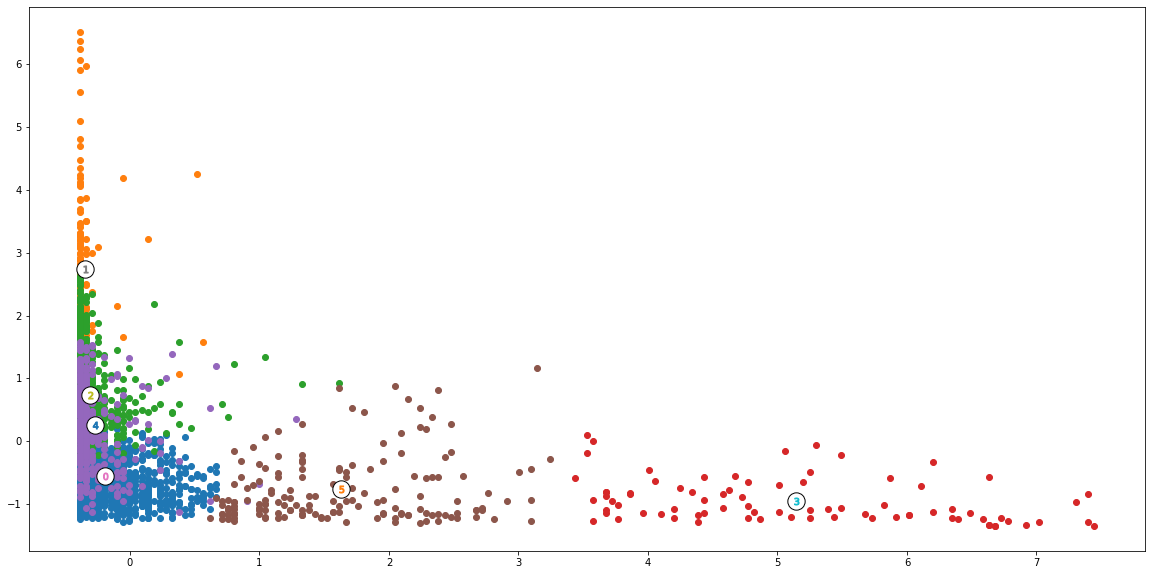

In [60]:
# Let's cluste our data. It's time for final action
clusterer = KMeans(n_clusters=6).fit(RFM_scaled_data)
predicts = clusterer.predict(RFM_scaled_data)
centres = clusterer.cluster_centers_

#Put the predictions into a pandas dataframe format
assignments = pd.DataFrame(predicts, columns = ['Cluster'])

# Put the predictions into a pandas dataframe format
plot_data = pd.concat([assignments, RFM_scaled_data], axis = 1)

#Color the points based on assigned cluster (n.b scatter will do this for us automatically)
plt.rcParams['figure.figsize'] = (20,10)

for i, c in plot_data.groupby('Cluster'):  
    plt.scatter(c[0], c[1])
    
#-- Plot where the cluster centers are
for i, c in enumerate(centres):
    plt.scatter(x = c[0], y = c[1], color = 'white', edgecolors = 'black', marker = 'o', s=300);
    plt.scatter(x = c[0], y = c[1], marker='${}$'.format(i), alpha = 1, s=50);

In [61]:

s_centres = scaler.inverse_transform(centres)
import numpy as np
segments = ['Segment {}'.format(i) for i in range(0, len(centres))]
true_centres = pd.DataFrame(np.round(s_centres), columns = RFM_data.columns)
true_centres.index = segments
print(true_centres)


           Recency  Frequency  Monetary
Segment 0      4.0       39.0     515.0
Segment 1      1.0      195.0    1907.0
Segment 2      2.0      100.0     803.0
Segment 3    116.0       20.0     236.0
Segment 4      2.0       77.0    1666.0
Segment 5     42.0       29.0     375.0


In [79]:

segments=pd.DataFrame(segments)


TypeError: __init__() got an unexpected keyword argument 'random'

In [63]:
RFM_data=RFM_data.reset_index(level=0)


In [64]:
#Join the segment assignments to the original data 
final_assigments = pd.concat([assignments, RFM_data], axis = 1)

#te a loop that describes summary statistics for each segment
for c, d in final_assigments.groupby('Cluster'):  
    print("Segment", c)
    display(d.describe())

Segment 0


,Cluster,customer_number,Recency,Frequency,Monetary
count,1533.0,1533.000000,1533.000000,1533.000000,1533.000000
mean,0.0,8263.380300,4.030659,38.714286,515.768904
std,0.0,4972.132628,4.644795,15.560479,228.048812
min,0.0,14.000000,0.000000,4.000000,18.360000
25%,0.0,3617.000000,1.000000,27.000000,350.800000
50%,0.0,8325.000000,2.000000,38.000000,484.720000
75%,0.0,12711.000000,6.000000,51.000000,647.150000
max,0.0,16316.000000,22.000000,78.000000,1222.340000


Segment 1


,Cluster,customer_number,Recency,Frequency,Monetary
count,151.0,151.000000,151.000000,151.000000,151.000000
mean,1.0,8218.940397,0.781457,194.953642,1907.346954
std,0.0,3673.662048,2.858657,51.487906,869.666041
min,1.0,263.000000,0.000000,116.000000,625.160000
25%,1.0,5252.500000,0.000000,158.500000,1389.400000
50%,1.0,8814.000000,0.000000,180.000000,1664.980000
75%,1.0,11072.000000,0.000000,216.000000,2298.930000
max,1.0,16292.000000,20.000000,374.000000,6588.650000


Segment 2


,Cluster,customer_number,Recency,Frequency,Monetary
count,745.0,745.000000,745.000000,745.000000,745.00000
mean,2.0,7521.267114,1.731544,100.316779,803.22404
std,0.0,4390.004865,3.669899,27.697949,231.05510
min,2.0,119.000000,0.000000,55.000000,255.63000
25%,2.0,3953.000000,0.000000,80.000000,632.32000
50%,2.0,7131.000000,1.000000,94.000000,799.67000
75%,2.0,10950.000000,2.000000,115.000000,975.57000
max,2.0,16287.000000,42.000000,195.000000,1363.15000


Segment 3


,Cluster,customer_number,Recency,Frequency,Monetary
count,80.0,80.000000,80.000000,80.000000,80.000000
mean,3.0,8563.925000,115.712500,20.237500,236.181500
std,0.0,5168.062722,24.395576,16.647685,162.946085
min,3.0,110.000000,80.000000,1.000000,48.830000
25%,3.0,3441.500000,95.500000,7.000000,114.865000
50%,3.0,9540.000000,113.000000,14.000000,193.745000
75%,3.0,12908.250000,136.500000,28.500000,318.187500
max,3.0,16100.000000,164.000000,70.000000,784.760000


Segment 4


,Cluster,customer_number,Recency,Frequency,Monetary
count,332.0,332.000000,332.000000,332.000000,332.000000
mean,4.0,7673.506024,2.454819,77.331325,1667.663886
std,0.0,3962.948368,4.428117,30.906718,423.740572
min,4.0,67.000000,0.000000,12.000000,1134.690000
25%,4.0,4454.750000,0.000000,52.000000,1363.647500
50%,4.0,7785.000000,1.000000,78.000000,1540.730000
75%,4.0,10782.250000,3.000000,101.250000,1854.652500
max,4.0,16203.000000,35.000000,140.000000,3764.810000


Segment 5


,Cluster,customer_number,Recency,Frequency,Monetary
count,159.0,159.000000,159.000000,159.000000,159.000000
mean,5.0,9699.930818,42.176101,28.647799,375.033333
std,0.0,4732.420399,14.161606,25.030902,278.998530
min,5.0,149.000000,21.000000,3.000000,7.280000
25%,5.0,5320.000000,30.000000,10.000000,167.610000
50%,5.0,11066.000000,41.000000,19.000000,275.760000
75%,5.0,13554.500000,53.500000,40.000000,528.400000
max,5.0,16184.000000,76.000000,120.000000,1536.300000


In [65]:
# Creating another column in our original data set with corresponding cluster number with each customer_number. 
RFM_data['label']=predicts

In [66]:
RFM_data.head()

,customer_number,Recency,Frequency,Monetary,label
0,14,1,56,675.72,0
1,45,1,33,585.73,0
2,52,2,59,222.18,0
3,61,3,37,547.87,0
4,63,7,48,293.34,0


Text(0.5, 0, 'Monetary')

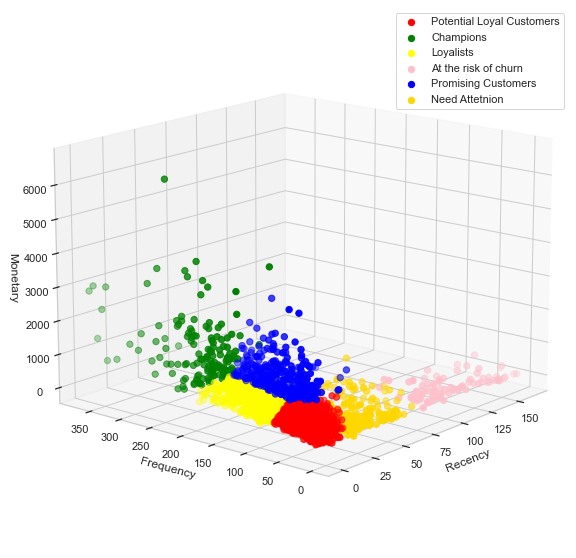

In [80]:
# lET'S PLOT 3D PLOT FOR OUR SEGMENTS
# Please note, after giving names to each segment, I have plotted this plot. If we re run this file, we might need to change the title of our cluster depending on the new clister. 
# for instance, here cluster 0 is of those customers with the risk of churning. In next iteration, we will need to change the title of the scatter points of each segmment.
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(20,10))
ax=fig.add_subplot(111,projection='3d')
ax.scatter(RFM_data.Recency[RFM_data.label==0], RFM_data['Frequency'][RFM_data.label==0], RFM_data['Monetary'][RFM_data.label==0], c='red', s=40, label='Potential Loyal Customers')
ax.scatter(RFM_data.Recency[RFM_data.label==1], RFM_data['Frequency'][RFM_data.label==1], RFM_data['Monetary'][RFM_data.label==1], c='green', s=40, label='Champions')
ax.scatter(RFM_data.Recency[RFM_data.label==2], RFM_data['Frequency'][RFM_data.label==2], RFM_data['Monetary'][RFM_data.label==2], c='yellow', s=40, label='Loyalists')
ax.scatter(RFM_data.Recency[RFM_data.label==3], RFM_data['Frequency'][RFM_data.label==3], RFM_data['Monetary'][RFM_data.label==3], c='pink', s=40, label='At the risk of churn')
ax.scatter(RFM_data.Recency[RFM_data.label==4], RFM_data['Frequency'][RFM_data.label==4], RFM_data['Monetary'][RFM_data.label==4], c='blue', s=40, label='Promising Customers')
ax.scatter(RFM_data.Recency[RFM_data.label==5], RFM_data['Frequency'][RFM_data.label==5], RFM_data['Monetary'][RFM_data.label==5], c='gold', s=40, label='Need Attetnion')
ax.view_init(15,220)
ax.legend(loc=1)
plt.xlabel('Recency')
plt.ylabel('Frequency')
ax.set_zlabel('Monetary')

In [81]:
RFM_data.label.value_counts()

0    1533
2     745
4     332
5     159
1     151
3      80
Name: label, dtype: int64

<AxesSubplot:xlabel='count', ylabel='label'>

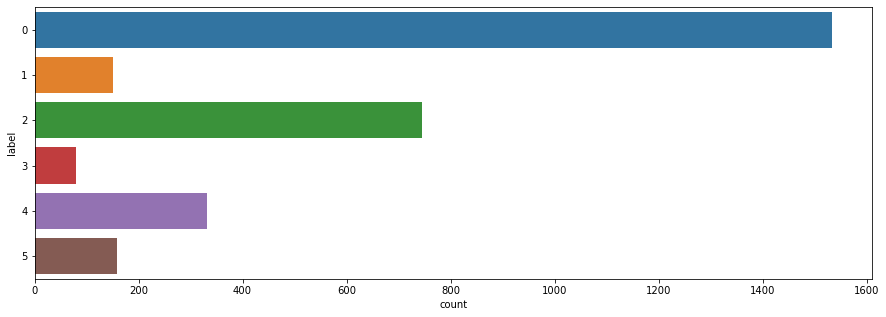

In [69]:
plt.figure(figsize=(15,5))
sns.countplot(y='label', data=RFM_data)

In [70]:
RFM_data1=RFM_data.copy()

In [82]:
# Here I have replaced the 0-5 segment names with the new names  I have givenn to each cluster. For new clusters,they might need tobe changed.
RFM_data1['label'] = RFM_data1['label'].replace(to_replace=0, value='Potential loyal customers')
RFM_data1['label'] = RFM_data1['label'].replace(to_replace=1, value='Champions')
RFM_data1['label'] = RFM_data1['label'].replace(to_replace=2, value='Loyal customers')
RFM_data1['label'] = RFM_data1['label'].replace(to_replace=3, value='At the risk of churn')
RFM_data1['label'] = RFM_data1['label'].replace(to_replace=4, value='Promising Customers')
RFM_data1['label'] = RFM_data1['label'].replace(to_replace=5, value='Need Attention')

Text(0.5, 1.0, 'Distribution of Customer Segments')

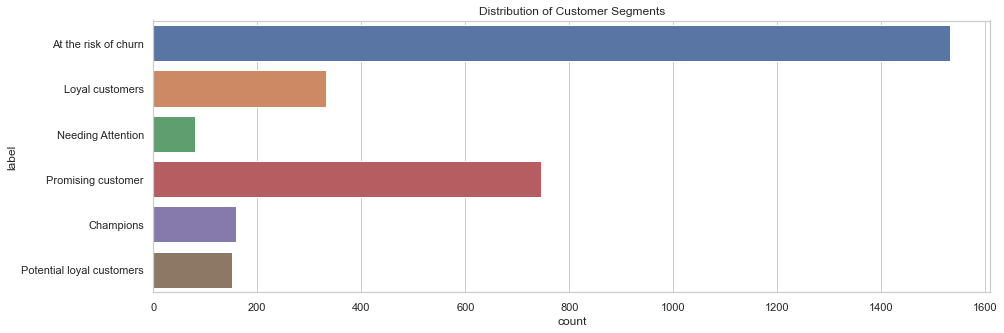

In [83]:
plt.figure(figsize=(15,5))
sns.countplot(y='label', data=RFM_data1)
plt.title('Distribution of Customer Segments')

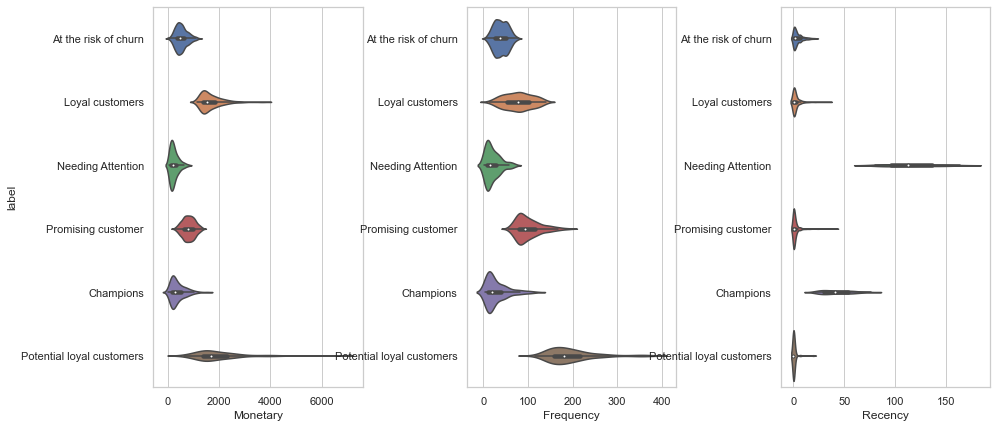

In [84]:
plt.figure(1,figsize=(15,7))
n=0
for cols in ['Monetary','Frequency','Recency']:
    n+=1
    plt.subplot(1,3,n)
    sns.set(style='whitegrid')
    plt.subplots_adjust(hspace=0.5,wspace=0.5)
    sns.violinplot(x=cols, y='label', data=RFM_data1)
    plt.ylabel('label'if n==1 else'')
    plt.title

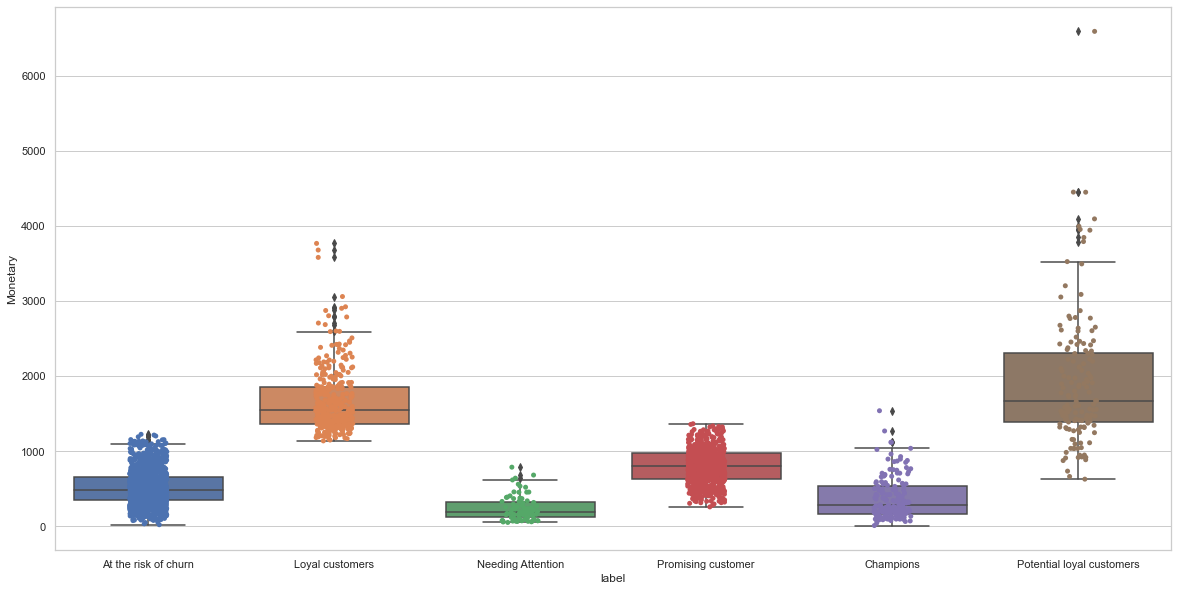

In [86]:
# Boxplot with Seaborn
import seaborn as sns
sns.set_style('whitegrid')
ax= sns.boxplot(x='label',y='Monetary',data=RFM_data1)
#ax=sns.boxplot(x='label', y='Frequency', data=RFM_data1)
#ax=sns.boxplot(x='lebel', y='Recency', data=RFM_data1)
ax = sns.stripplot(x='label', y='Monetary',data=RFM_data1)

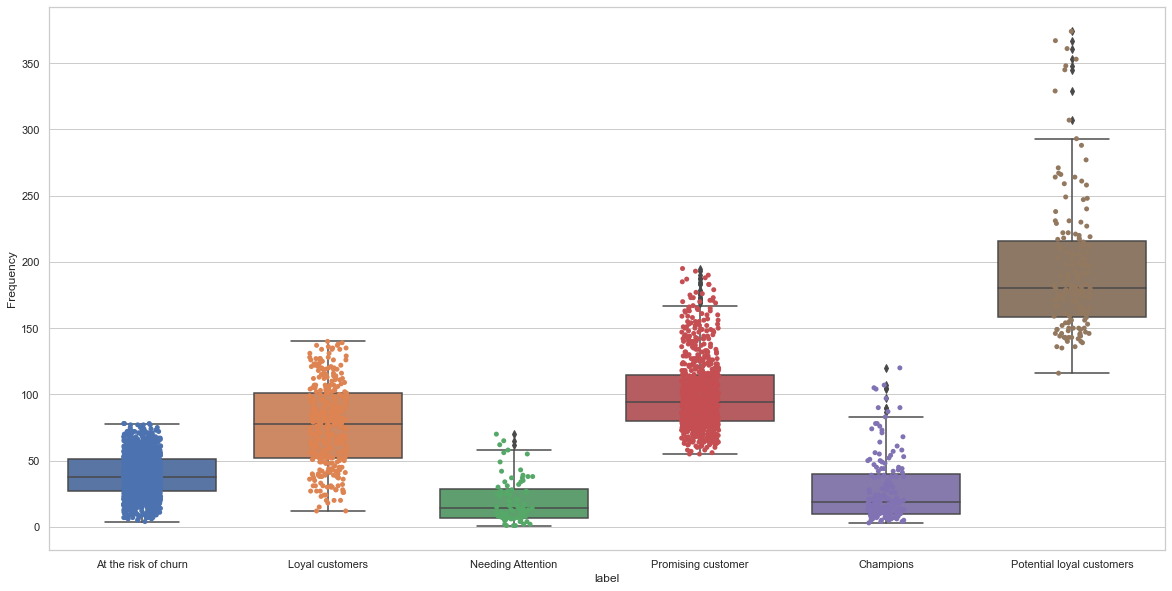

In [87]:
# Boxplot with Seaborn
import seaborn as sns
sns.set_style('whitegrid')
#ax= sns.boxplot(x='label',y='Monetary',data=RFM_data1)
ax=sns.boxplot(x='label', y='Frequency', data=RFM_data1)
#ax=sns.boxplot(x='lebel', y='Recency', data=RFM_data1)
ax = sns.stripplot(x='label', y='Frequency',data=RFM_data1)

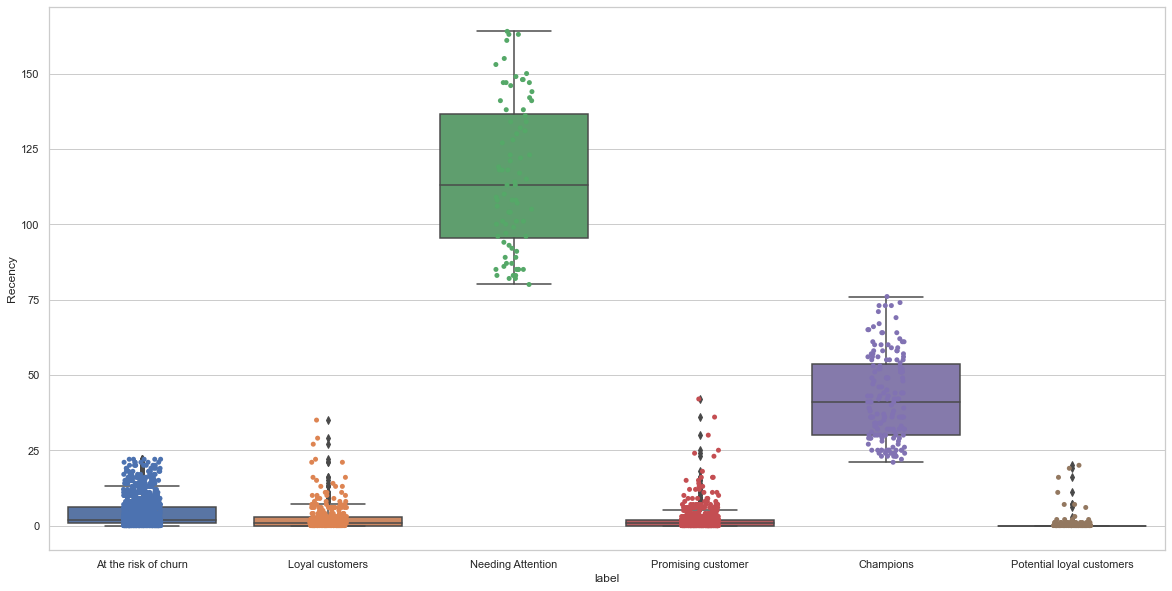

In [88]:
# Boxplot with Seaborn
import seaborn as sns
sns.set_style('whitegrid')
ax= sns.boxplot(x='label',y='Recency',data=RFM_data1)
#ax=sns.boxplot(x='label', y='Frequency', data=RFM_data1)
#ax=sns.boxplot(x='lebel', y='Recency', data=RFM_data1)
ax = sns.stripplot(x='label', y='Recency',data=RFM_data1)

In [89]:
RFM_data1.to_csv("Basket_segmented_data_.csv")